In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Muhammad Rengga\AppData\Local\Temp\ipykernel_17704\459852561.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", period="90d", interval="1h")
[*********************100%***********************]  1 of 1 completed


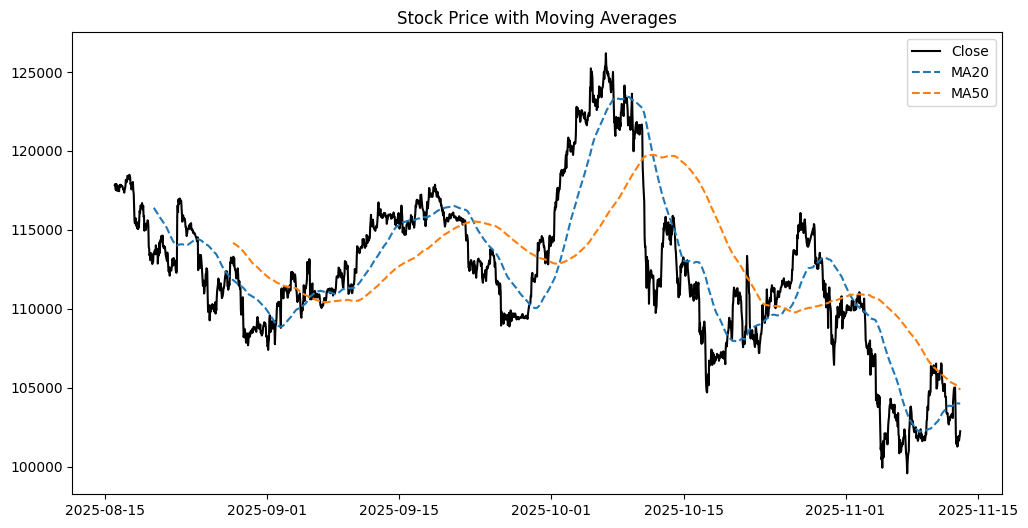

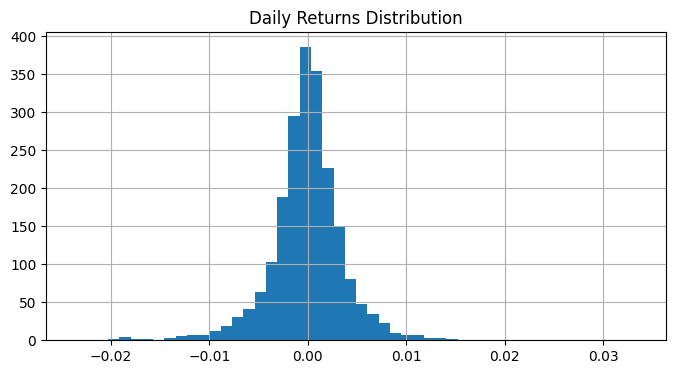

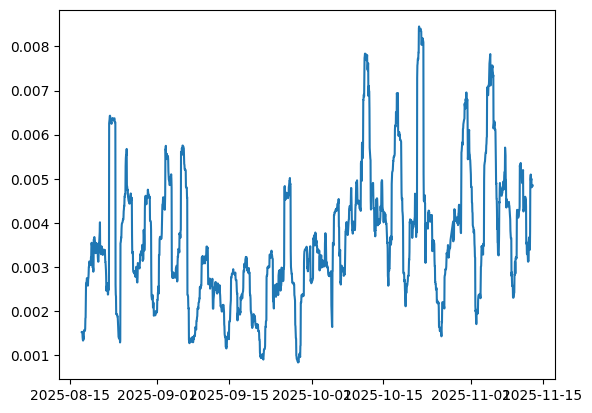

In [10]:
btc = yf.download("BTC-USD", period="90d", interval="1h")

btc["Return"] = btc["Close"].pct_change()
btc["log_return"] = np.log(btc["Close"] / btc["Close"].shift(1))
btc["MA100"] = btc["Close"].rolling(100).mean()
btc["MA300"] = btc["Close"].rolling(300).mean()

plt.figure(figsize=(12,6))
plt.plot(btc["Close"], label="Close", color="black")
plt.plot(btc["MA100"], label="MA20", linestyle="--")
plt.plot(btc["MA300"], label="MA50", linestyle="--")
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()

btc["Return"].hist(bins=50, figsize=(8,4))
plt.title("Daily Returns Distribution")
plt.show()

btc["rolling_vol"] = btc["log_return"].rolling(30).std()
plt.plot(btc["rolling_vol"])

| Observation                                             | Suggests Model                                      | Why                                                       |
| ------------------------------------------------------- | --------------------------------------------------- | --------------------------------------------------------- |
| Returns fluctuate randomly around 0                     | **Random Walk / Efficient Market Hypothesis (EMH)** | You may not beat the market; focus on volatility modeling |
| Volatility clusters (high-vol follows high-vol)         | **GARCH / EGARCH / ARCH**                           | Captures time-varying volatility                          |
| Trend exists (price crosses MA20 > MA50 often)          | **Momentum or Moving Average Crossover Strategy**   | Exploits persistent drift                                 |
| Returns have fat tails or skew                          | **t-distribution or stochastic volatility models**  | Normal distribution underestimates tail risk              |
| Autocorrelation present in returns or squared returns   | **ARIMA (for mean)** or **GARCH (for volatility)**  | Captures predictable components                           |
| Regime shifts (periods of calm & chaos)                 | **Markov Switching Model**                          | Markets change behavior structurally                      |
| Features available beyond price (volume, news, factors) | **Machine Learning Models (RF, XGB, LSTM)**         | Multivariate modeling of cross-sectional or temporal data |


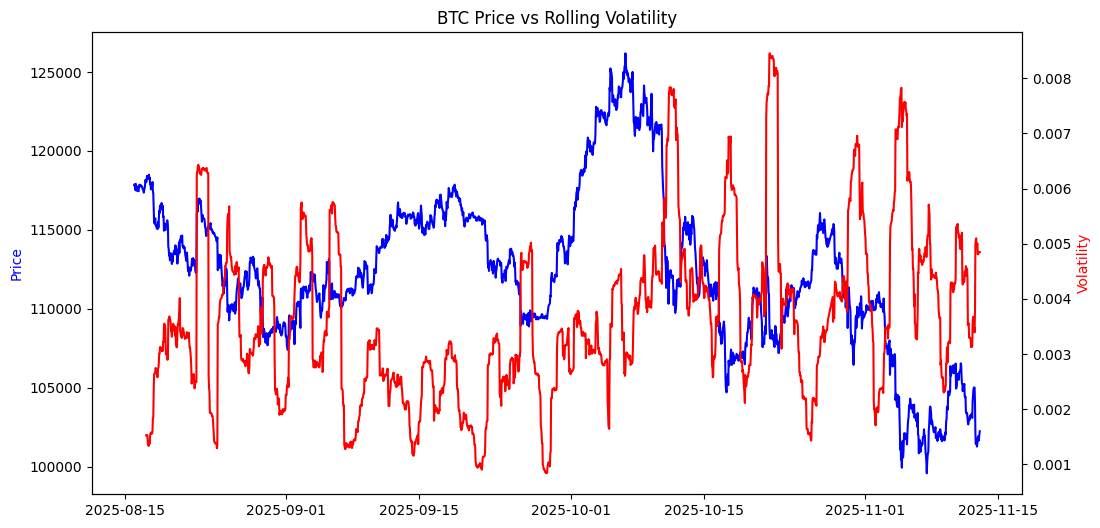

In [11]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(btc["Close"], color='blue', label='BTC Price')
ax1.set_ylabel("Price", color='blue')

ax2 = ax1.twinx()
ax2.plot(btc["rolling_vol"], color='red', label='Rolling Volatility')
ax2.set_ylabel("Volatility", color='red')

plt.title("BTC Price vs Rolling Volatility")
plt.show()